In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import random
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DA-Project/bank-additional-full.csv',sep=";")

In [ ]:
for i in df:
  print(i,df[i].dtype)

age int64
job object
marital object
education object
default object
housing object
loan object
contact object
month object
day_of_week object
duration int64
campaign int64
pdays int64
previous int64
poutcome object
emp.var.rate float64
cons.price.idx float64
cons.conf.idx float64
euribor3m float64
nr.employed float64
y object


In [ ]:
del df['duration']

In [ ]:
#Checking for duplicates
duplicate_rows_df = df.duplicated()
print(duplicate_rows_df.sum())

1784


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
duplicate_rows_df = df.duplicated()
print(duplicate_rows_df.sum())

0


In [ ]:
count = 0
for i in df['y']:
  if i == "no":
    count = count+1
print(count)

34806


In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
random.random()

0.19257679608270795

In [ ]:
data1 = df.loc[(df["y"] == "yes")]
data1.shape

(4598, 20)

In [ ]:
data2 = df.loc[(df["y"] == "no")]
data2.shape

(34806, 20)

In [ ]:
data2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
data1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
np.random.seed(10)
#deleting random samples with y = 'no'
remove_n = 24806
drop_indices = np.random.choice(data2.index, remove_n, replace=False)
data2_subset = data2.drop(drop_indices)

In [ ]:
data2_subset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
12,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41149,30,admin.,single,university.degree,no,yes,no,cellular,nov,mon,2,999,0,nonexistent,-1.1,94.767,-50.8,1.039,4963.6,no
41152,26,management,single,university.degree,no,yes,no,cellular,nov,mon,5,999,0,nonexistent,-1.1,94.767,-50.8,1.039,4963.6,no
41154,41,technician,married,professional.course,no,yes,no,cellular,nov,mon,2,999,0,nonexistent,-1.1,94.767,-50.8,1.039,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
data2 = data2_subset

In [ ]:
data = pd.concat([data1,data2])

In [ ]:
del data['pdays']

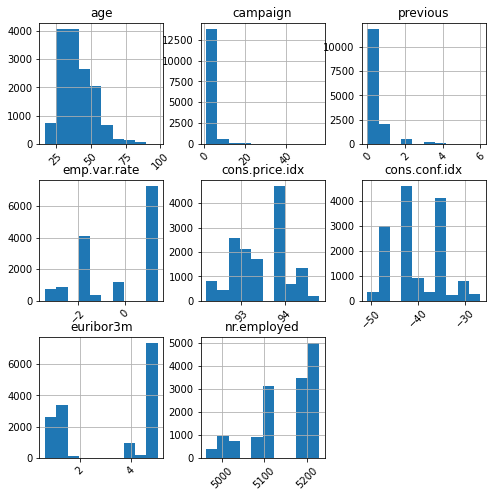

In [ ]:
data.hist(figsize=(8,8), xrot=45)
plt.show()

In [ ]:
#Converting table to One Hot Encoded form
cat=data.select_dtypes(include="object")

In [ ]:
enc_cat = pd.get_dummies(cat)

In [ ]:
enc_cat

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
75,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
83,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
88,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
129,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
139,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41149,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
41152,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
41154,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
41182,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0


In [ ]:
for i in cat:
  del data[i]

In [ ]:
data = pd.concat([data,enc_cat],axis = 1)

In [ ]:
data

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
75,41,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
83,49,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
88,49,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
129,41,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
139,45,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41149,30,2,0,-1.1,94.767,-50.8,1.039,4963.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
41152,26,5,0,-1.1,94.767,-50.8,1.039,4963.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
41154,41,2,0,-1.1,94.767,-50.8,1.039,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
41182,29,1,1,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0


In [ ]:
del data["y_no"]

In [ ]:
data.rename(columns={'y_yes': 'y'}, inplace=True)

In [ ]:
data

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
75,41,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
83,49,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
88,49,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
129,41,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
139,45,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41149,30,2,0,-1.1,94.767,-50.8,1.039,4963.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
41152,26,5,0,-1.1,94.767,-50.8,1.039,4963.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
41154,41,2,0,-1.1,94.767,-50.8,1.039,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
41182,29,1,1,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
#checking for null values
data.isnull().sum()

age                     0
campaign                0
previous                0
emp.var.rate            0
cons.price.idx          0
                       ..
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
y                       0
Length: 61, dtype: int64

In [ ]:
Y = data['y']

In [ ]:
X = data.drop(['y'],axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting the Dataset into training and testing dataset

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X,Y, random_state = 101, stratify = Y, test_size = 0.25)

In [ ]:
y_train.value_counts(normalize = True)

0    0.685057
1    0.314943
Name: y, dtype: float64

In [ ]:
y_valid.value_counts(normalize = True)

0    0.684932
1    0.315068
Name: y, dtype: float64

In [ ]:
X_train.shape , y_train.shape

((10948, 60), (10948,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=10)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
dt_model.score(X_train,y_train)

0.9967117281695287

In [ ]:
dt_model.score(X_valid, y_valid)

0.6887671232876712

In [ ]:
dt_model.predict(X_valid)

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [ ]:
dt_model.predict_proba(X_valid)

array([[1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       ...,
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ]])

In [ ]:
y_pred = dt_model.predict_proba(X_valid)[:,1]

In [ ]:
new_y = []
for i in range(len(y_pred)):
  if y_pred[i] < 0.4:
    new_y.append(0)
  else:
    new_y.append(1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, new_y)

0.689041095890411

In [ ]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
  dt_model = DecisionTreeClassifier(max_depth=depth, random_state = 10)
  dt_model.fit(X_train,y_train)
  train_accuracy.append(dt_model.score(X_train,y_train))
  validation_accuracy.append(dt_model.score(X_valid,y_valid))

In [ ]:
frame = pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.783979,0.775342
1,2,0.783979,0.775342
2,3,0.792930,0.782466
3,4,0.800420,0.792603
4,5,0.803343,0.795890


No handles with labels found to put in legend.


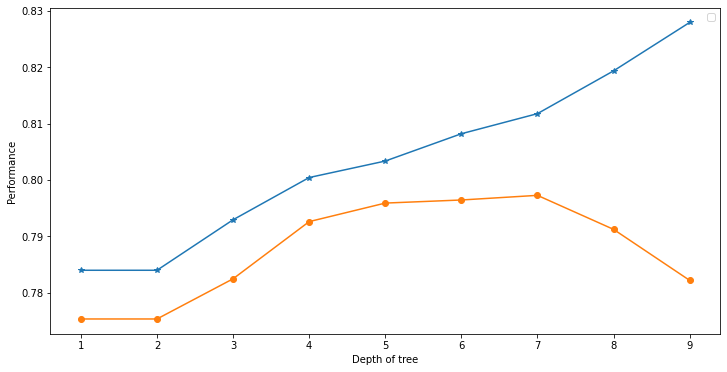

In [ ]:
#Checking for optimal depth of Decision Tree by comparing accuracy for different depths
plt.figure(figsize = (12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker = '*')
plt.plot(frame['max_depth'],frame['valid_acc'],marker = 'o')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=25, random_state=10)
dt_model.fit(X_train,y_train)
dt_model.score(X_train,y_train)

0.8057179393496529

In [ ]:
dt_model.score(X_valid,y_valid)

0.7975342465753424

In [ ]:
from sklearn import tree

In [ ]:
!pip install graphviz

In [ ]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns, max_depth=7, filled = True)

In [ ]:
!dot -Tpng tree.dot -o tree.png

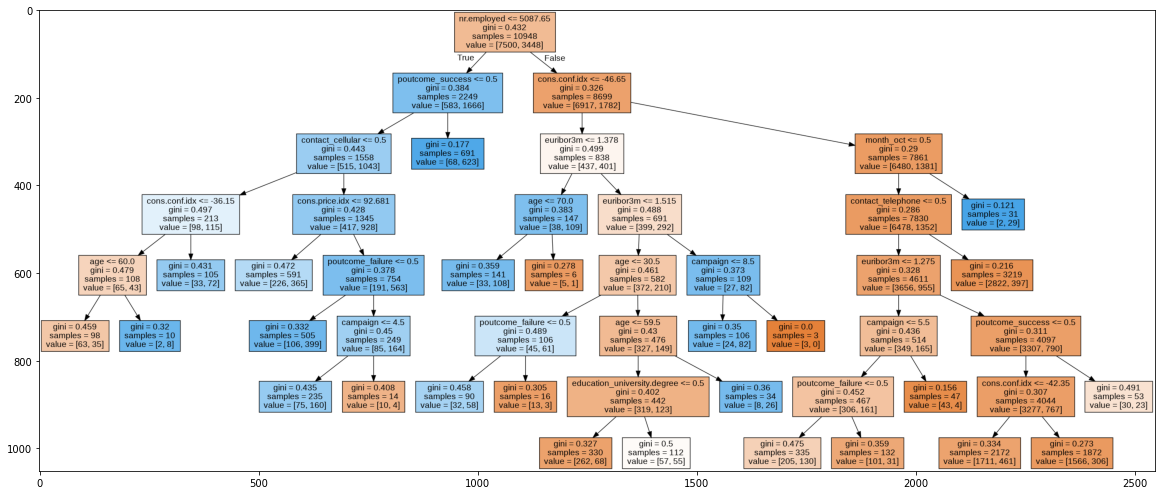

In [ ]:
#Plotting the decision tree
image = plt.imread('tree.png')
plt.figure(figsize = (20,20))
plt.imshow(image)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
#Checking model performance
y_pred = dt_model.predict_proba(X_valid)[:,1]
new_y = []
for i in range(len(y_pred)):
  if y_pred[i] < 0.4:
    new_y.append(0)
  else:
    new_y.append(1)
acc = accuracy_score(y_valid, new_y)
pred = dt_model.predict(X_valid)
precision = precision_score(y_valid, pred)
recall = recall_score(y_valid, pred)
f1 = 2*(precision*recall)/(precision+recall)

In [ ]:
acc

0.7975342465753424

In [ ]:
precision

0.7397899649941657

In [ ]:
recall

0.551304347826087

In [ ]:
f1

0.6317887394120579